# K-Means Clustering

In this example we will be using '[Wholesale customers data.csv](https://archive.ics.uci.edu/dataset/292/wholesale+customers)' dataset from UCI Machine Learning Repository.

The values represent the Customer spend on each of the products.  The objective is to segment these customers based on their purchase patterns.

In [1]:
# prompt: load libraries to create K Means clustering model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# prompt: load the file 'Wholesale customers data.csv'

# Load the dataset
data = pd.read_csv('Wholesale customers data.csv')

# Display the first few rows of the data
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Since a lot of variation in the magnitude of numbers are found between different columns, we will apply Scaling to reduce these variations.

In [3]:
# prompt: Apply scaling to the data

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

# Display the first few rows of the scaled data
print(scaled_data.head())
scaled_data.describe()

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [4]:
# prompt: Perform k-means clustering with 2 clusters and init='k-means++'

# Perform K-Means clustering with 2 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
kmeans.fit(scaled_data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the scaled data DataFrame
scaled_data['Cluster'] = labels

# Display the first few rows of the data with cluster labels
print(scaled_data.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  Cluster  
0         -0.043569   -0.066339        1  
1          0.086407    0.089151        1  
2          0.133232    2.243293        1  
3         -0.498588    0.093411        0  
4         -0.231918    1.299347        1  


In [5]:
kmeans.inertia_

2599.3855593561398

In [6]:
# prompt: Display the size of each cluster

# Display the size of each cluster
print(scaled_data['Cluster'].value_counts())

Cluster
0    304
1    136
Name: count, dtype: int64


In [7]:
# prompt: Create a weightage table with clusters in rows and features in columns

# Calculate the mean of each feature for each cluster
cluster_means = scaled_data.groupby('Cluster').mean()

# Transpose the table to have features as columns
cluster_means = cluster_means.T

# Rename the columns to represent the clusters
cluster_means.columns = [f'Cluster {i}' for i in cluster_means.columns]

# Display the weightage table
cluster_means

,Cluster 0,Cluster 1
Channel,-0.641045,1.432924
Region,-0.051581,0.115299
Fresh,0.123661,-0.276419
Milk,-0.336284,0.751694
Grocery,-0.422414,0.944220
Frozen,0.124491,-0.278274
Detergents_Paper,-0.438000,0.979059
Delicassen,-0.090978,0.203362


**Observations:**  


*   **Cluster 0:**  
  *  Scores Low on all Categories.  These are most likely small businesses
*   **Cluster 1:**
  *  Scores high in Channel, Milk, Grocery and Detergents.  These are most likely Supermarkets.



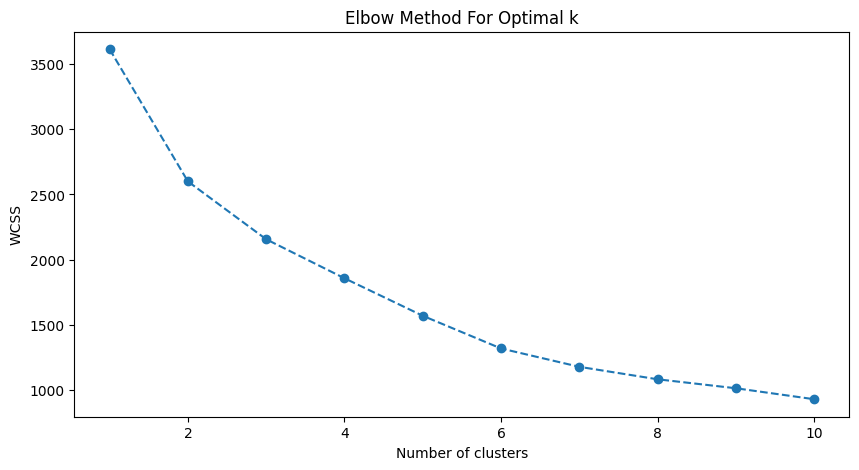

In [8]:
# prompt: Create elbow diagram to determine optimal k value

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow diagram
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# prompt: Suggest optimal number of clusters from the Elbow Diagram

# The optimal number of clusters is typically where the elbow occurs in the plot.
# Visually inspect the plot generated by the code.  Look for the point where the
# decrease in WCSS starts to level off.  This "elbow" point represents a good
# balance between minimizing WCSS and avoiding an excessive number of clusters.

# In the provided code, the elbow appears to be around k=2 or k=3.
# There's no single "correct" answer, and the best choice depends on the
# specific application and desired level of granularity in the clusters.
# Further analysis or domain expertise might be needed to determine the most
# suitable number of clusters.

Seems like the Optimal Number of Clusters (k) is 6

In [15]:
# prompt: Perform k-means clustering for 6 clusters and init='kmeans++'

# Perform K-Means clustering with 6 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmeans.fit(scaled_data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the scaled data DataFrame
scaled_data['Cluster'] = labels

# Display the first few rows of the data with cluster labels
print(scaled_data.head())



    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  Cluster  
0         -0.043569   -0.066339        1  
1          0.086407    0.089151        1  
2          0.133232    2.243293        1  
3         -0.498588    0.093411        3  
4         -0.231918    1.299347        1  


In [16]:
kmeans.inertia_

1317.5736428433713

By increasing the number of clusters from 2 to 6, we were able to reduce Intertia from 2599 to 1317 - This is a significant improvement in model performance.

In [18]:
# prompt: Display size of each cluster

# Calculate the size of each cluster
cluster_sizes = scaled_data['Cluster'].value_counts()

# Display the size of each cluster
print("Size of each cluster:")
cluster_sizes

Size of each cluster:


,count
Cluster,
3,173
1,125
0,84
5,46
2,11
4,1


Cluster 4 has only 1 value.  Similarly Cluster 2 has only 11.  Therefore, let us rebuild the model with only 4 Clusters.

In [19]:
# prompt: Perform K means clustering with 4 clusters

# Perform K-Means clustering with 4 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(scaled_data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the scaled data DataFrame
scaled_data['Cluster'] = labels

# Display the first few rows of the data with cluster labels
print(scaled_data.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  Cluster  
0         -0.043569   -0.066339        2  
1          0.086407    0.089151        2  
2          0.133232    2.243293        2  
3         -0.498588    0.093411        1  
4         -0.231918    1.299347        2  


In [20]:
# prompt: Display size of each cluster

# Calculate the size of each cluster
cluster_sizes = scaled_data['Cluster'].value_counts()

# Display the size of each cluster
print("Size of each cluster:")
cluster_sizes

Size of each cluster:


,count
Cluster,
1,219
2,125
0,84
3,12


In [21]:
# prompt: Create a Weightage Table

# Calculate the mean of each feature for each cluster
cluster_means = scaled_data.groupby('Cluster').mean()

# Transpose the table to have features as columns
cluster_means = cluster_means.T

# Rename the columns to represent the clusters
cluster_means.columns = [f'Cluster {i}' for i in cluster_means.columns]

# Display the weightage table
cluster_means

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Channel,-0.639370,-0.651230,1.448652,1.270406
Region,-1.579733,0.531627,0.125186,0.051916
Fresh,-0.119526,0.214648,-0.345684,0.520236
Milk,-0.357840,-0.329264,0.428947,4.045753
Grocery,-0.411576,-0.428867,0.663751,3.793777
Frozen,0.017202,0.161447,-0.352768,0.607852
Detergents_Paper,-0.438115,-0.437926,0.694200,3.827702
Delicassen,-0.160055,-0.063476,0.004076,2.236370


**Interpretation of the Pair Table**  

**Cluster 0:  Small Businesses**

*   **Lower Spending Across Categories:** This cluster shows negative average values for most features, especially 'Channel', 'Region', 'Detergents_Paper', 'Grocery', and 'Milk'. This suggests these customers generally spend less in these categories compared to other clusters.
*   **Potential Customer Type:** This cluster might represent smaller businesses, individual customers, or stores in less populated regions with lower overall demand.
*  **Slightly Higher Frozen Food Purchases:** While most categories have negative values, 'Frozen' has a slightly positive value (0.017), indicating a slight preference or higher relative spending on frozen goods compared to other categories for this cluster.

**Cluster 1:  Convenience Stores**

*   **Mixed Spending Pattern:** This cluster demonstrates a more mixed spending pattern. While 'Channel', 'Detergents_Paper', 'Grocery', and 'Milk' have negative average values, 'Fresh' and 'Frozen' show positive values.
*   **Potential Customer Type:** This could represent customers who prioritize fresh and frozen goods over other categories. They might be convenience stores or customers with specific dietary preferences.
*  **Regional Variation:** The positive 'Region' value (0.531) suggests this cluster could be concentrated in a specific region or demographic area with higher purchasing power.


**Cluster 2:  Supermarkets**

*   **Higher Spending on Milk, Grocery, and Detergents_Paper:** This cluster has high positive values for 'Channel', 'Milk', 'Grocery', and 'Detergents_Paper', indicating significantly higher spending in these categories compared to other clusters.
* **Potential Customer Type:** This might represent large grocery stores, supermarkets, or customers with large families who purchase more household essentials and staple food items.
* **Lower Spending on Fresh and Frozen:** Conversely, 'Fresh' and 'Frozen' have negative values, suggesting lower relative spending on these categories.



**Cluster 3:   Wholesellers**


*   **Highest Spending Across Most Categories:** This cluster stands out with the highest positive average values for almost all features, especially 'Channel', 'Delicassen', 'Detergents_Paper', 'Fresh', 'Frozen', 'Grocery', and 'Milk'.
*   **Potential Customer Type:** This cluster likely represents the largest and most frequent shoppers, potentially wholesale or institutional buyers like restaurants, hotels, or large retailers.
*  **Preference for Delicassen:** The exceptionally high value for 'Delicassen' (2.236) indicates a strong preference for this category compared to other clusters.


